# Tratamiento de las curvas de luz: eliminación de la tendencia y del ruido natural de las estrellas

## Objetivo

El **objetivo** de este archivo es eliminar la **tendencia natural** de las **curvas de luz** a fin de poder identificar más fácilmente los **descensos en el flujo luminoso** de la curva (TCEs).

## Librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wotan import flatten

## Ejemplo aplicado al cuarto cuatrimestre de la estrella 11442793

Para comprobar la efectividad del método a seguir, vamos a aplicarlo a la curva de luz del cuarto cuatrimestre de la estrella Kepler 11442793. Esta estrella presenta varios TCEs muy visibles que nos servirán como ejemplo para el resto de curvas de luz. En primer lugar, cargamos el archivo CSV que contiene todos los cuatrimestres unidos que componen la curva.

In [2]:
# Cargamos la curva de luz
lc = pd.read_csv('/Users/leztin/Desktop/Prueba/kplr011442793.csv')

De él extraemos tres variables: la variable TIME, la variable PDCSAP_FLUX (flujo lúminico con el pipeline aplicado por la NASA) y la variable flux_mediana (variable que añadí cuando uní los cuatrimestres de cada estrella en archivos CSV únicos, y que normaliza en torno al valor 1 todos los cuatrimestres de la curva). Recordemos que la representación original se ve de la siguiente manera:

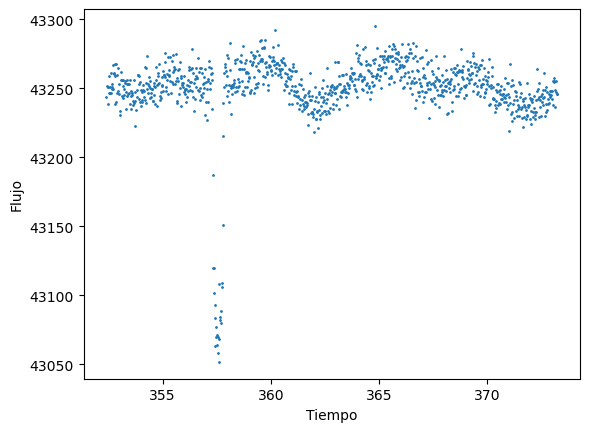

In [3]:
lc_filtered = lc.loc[lc['contador'] == 4]

time = lc_filtered['TIME']
flux = lc_filtered['PDCSAP_FLUX']
flux_mediana = lc_filtered['flux_mediana']

plt.scatter(time, flux, s=1)
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Para este cuatrimestre en concreto, se puede observar claramente un TCE en el punto temporal 358. Con la creación de un spline polinomial, se pretende eliminar la variación natural de la curva sin que el propio spline se vea afectado por el descenso provocado por el TCE. Para ello emplearemos la función `flatten()` de la librería `{wotan}`, que permite ir generando el spline en función de una ventana temporal (en días) que provoca que el ajuste sea más o menos agresivo respecto de la variabilidad de la información lumínica. En nuestro caso, y según recomendación de los autores, iremos modificando el valor de esa ventana temporal en función de la duración de cada TCE en concreto. Se recomienda que el valor en días de la ventana temporal sea 3 veces superior a la duración (o repetición) del supuesto tránsito planetario. A modo de ejemplo, el tránsito del planeta Tierra frente al Sol tiene una duración aproximada de 13 horas, lo que supondría configurar una ventana temporal de 1.62 días para que el spline no pudiera verse afectado por la disminución lumínica del propio tránsito.

Para la estrella que nos ocupa, y según nuestro archivo CSV que registra los distintos TCEs investigados, la duración del tránsito es de 14.49 horas. Ello hace necesaria una ventana temporal de, al menos, 1.8 días. A continuación se muestra la línea adaptada del spline en color rojo.

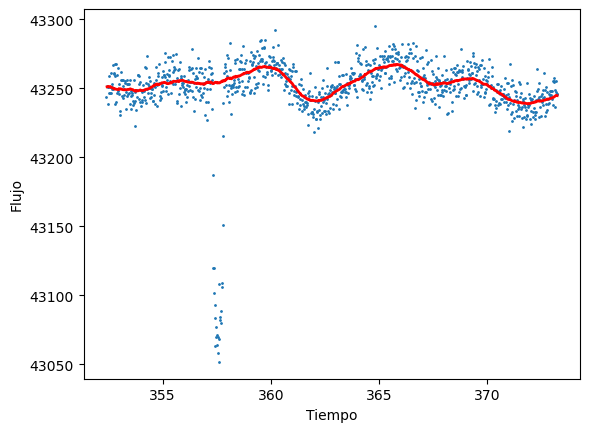

In [4]:
flatten_lc2, trend_lc2 = flatten(
    time, flux, window_length=1.8, return_trend=True, method='biweight')

plt.scatter(time, flux, s=1)
plt.plot(time, trend_lc2, linewidth=2, color='red')
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Como se puede observar, el spline se adapta perfectamente a la variabilidad natural del brillo de la estrella, ignorando el descenso tan prolongado causado por el TCE. El método empleado para el aplanamiento se fundamenta en la función biweight de Tukey, un estimador de ubicación robusto e iterativo que no se ve afectado por outliers (parámetro `window_length`), ni por valores ausentes. Una vez aplicado el spline, la representación del flujo lumínico tomaría la siguiente forma:

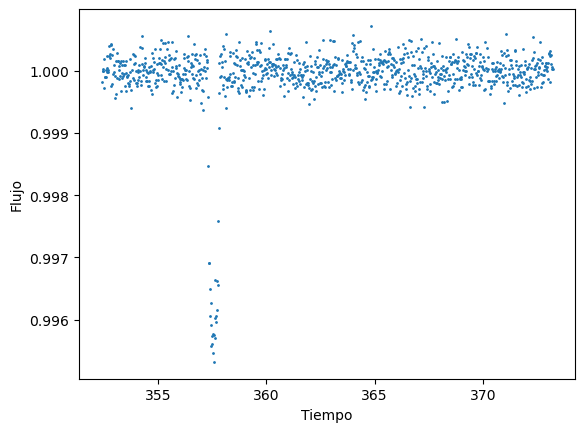

In [5]:
plt.scatter(time, flatten_lc2, s=1)
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Como se puede observar, el resultado es bastante satisfactorio. A continuación, aplicaremos este mismo proceso a todos los cuatrimestres que componen la curva de luz de la estrella Kepler 11442793.

## Ejemplo aplicado a la curva de luz completa de la estrella 11442793

De nuevo, este es el aspecto de los 17 cuatrimestres que componen la curva de luz completa de la estrella 11442793. Cada cuatrimestre se ha dividido entre su mediana con tal de que todos permanezcan centrados en un mismo punto sobre el eje y.

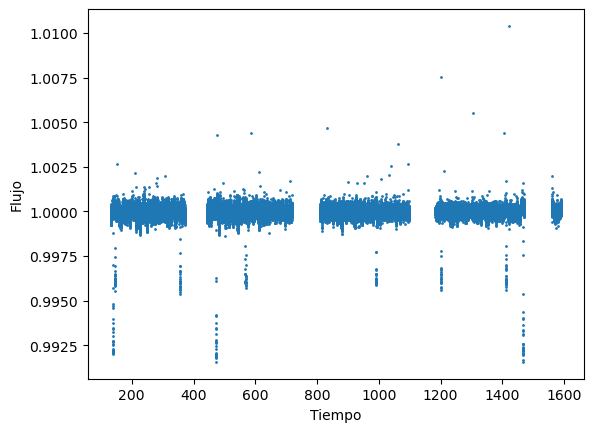

In [6]:
time_all = lc['TIME']
flux_all = lc['PDCSAP_FLUX']
flux_mediana_all = lc['flux_mediana']

plt.scatter(time_all, flux_mediana_all, s=1)
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

A continuación se vuelve a lanzar la función:

In [7]:
flatten_lc1, trend_lc1 = flatten(
    time_all, flux_mediana_all, window_length=1.8, return_trend=True, method='biweight')

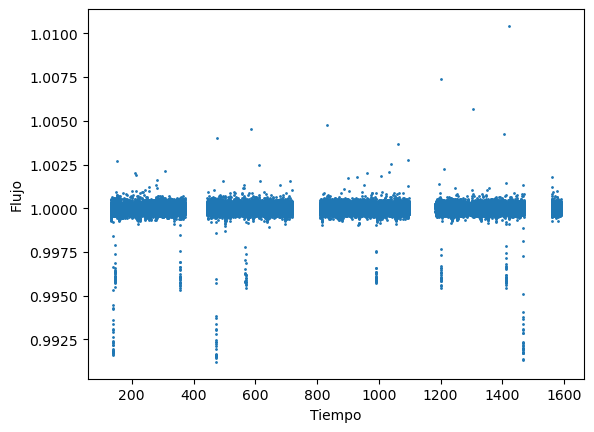

In [8]:
plt.scatter(time_all, flatten_lc1, s=1)
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

De nuevo, la diferencia es significativa. Acerquemos el gráfico para comparar mejor.

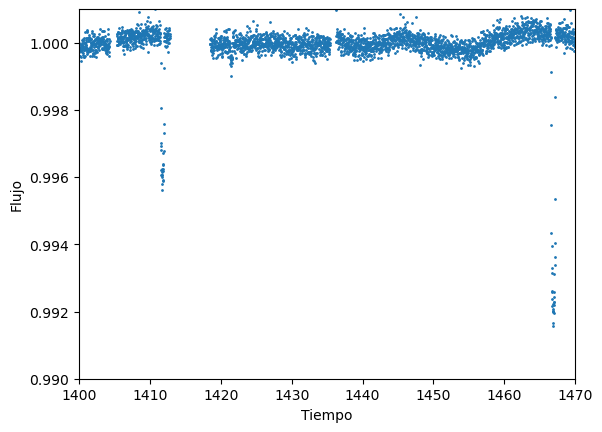

In [9]:
# Curva de luz original 
plt.scatter(time_all, flux_mediana_all, s=1)
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.xlim(1400, 1470)
plt.ylim(0.990, 1.001)
plt.show()

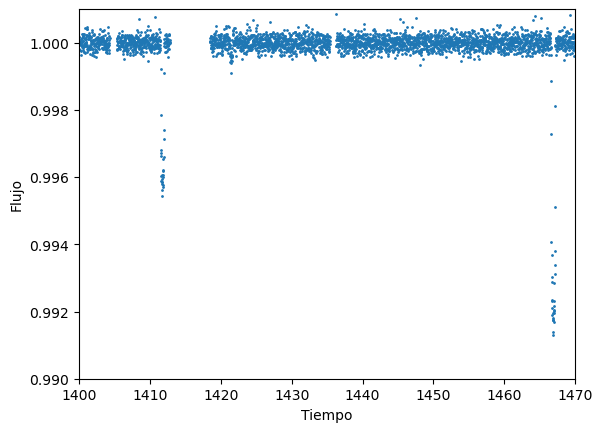

In [10]:
# Curva de luz sin tendencia
plt.scatter(time_all, flatten_lc1, s=1)
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.xlim(1400, 1470)
plt.ylim(0.990, 1.001)
plt.show()

Tras aplicar el proceso de «detrend» a toda nuestra muestra, el siguiente paso para la depuración de nuestras curvas de luz será eliminar los valores outliers que, por errores en la medición, se originaron fundamentalmente en la parte superior de las mismas.